In [5]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:Consolas;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red">ch10.N차원배열다루기#1</font>
    
- [numpy] (https://numpy.org/doc/stable/)
- [numpy_API] (https://numpy.org/doc/stable/reference/index.html#reference)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c언어로 구현되어 고성능 수치 계산 패키지

# 1절 numpy(넘파이) 패키지

In [43]:
import numpy as np
np.__version__

'1.23.5'

In [44]:
# 배열 생성 함수
# np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
type(a), a

(numpy.ndarray,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

## 1.1. 배열속성

In [45]:
from numpy import arange

a = arange(15).reshape(3,5) #3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [46]:
type(a) # a변수의 타입

numpy.ndarray

In [47]:
a.dtype # a배열 요소의 type

dtype('int32')

In [48]:
a.dtype.name

'int32'

In [49]:
a.itemsize # 한 요소의 bytesize

4

In [50]:
a.ndim # 차원수(축수)

2

In [51]:
a.size # 배열 요소의 수

15

In [52]:
a.shape # 배열 구조의 (튜븦)

(3, 5)

## 1-2. 배열 변경(구조, 타입)

In [58]:
# 구조변경
print("구조변경 전", a, sep="\n")
a.shape = (5, 3)
print("구조변경 후", a, sep="\n")

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [60]:
# 타입변경 (x) - 이렇게 하면 안 된다.
 
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [61]:
a.dtype

dtype('int32')

In [63]:
a.itemsize

4

In [65]:
a.dtype = np.int64 # a배열을 읽을 떄 64bit씩 읽는다.
a.dtype

dtype('int64')

In [69]:
a.size, a.shape

(6, (3, 2))

In [70]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [88]:
# 타입변경 (O)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
a.astype(np.int64) # a.astype('int64') 같음

In [99]:
a = a.astype(np.int64)

In [100]:
a.astype('int64')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [101]:
a.dtype

dtype('int64')

In [102]:
a.itemsize

8

In [103]:
a.size, a.shape

(12, (3, 4))

In [104]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [105]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [106]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3. 배열저장

In [ ]:
# 배열 저장 - pkl , npy
# 딥러닝모델 저장 - h5(hdf5), keras
# 머신러닝 저장 - pkl , joblib

In [107]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [108]:
# 용량이 작은
import pickle
with open("data/ch10_a.pkl", "wb") as f:
    pickle.dump(a, f)

In [109]:
with open("data/ch10_a.pkl", 'rb') as f:
    load_a = pickle.load(f)

In [110]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [114]:
# a == load_a
np.all(a == load_a) # a 넘파이배열과 load_a 넘파이 배열이 같은지

True

In [115]:
# 용량이 큰
np.save("data/ch10_a.npy",a)

In [116]:
load_a2 = np.load('data/ch10_a.npy')
load_a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [117]:
np.all(load_a2 == a)

True

# 2절. 넘파이 배열

- array() 함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ons(), zeros(), empty()
- 랜덤값을 갖는 함수들...

## 2.1. array() 함수로 넘파이 배열 만들기

- np.array(list나 tuple, dtype=np.xxx, copy=T/F)

In [125]:
a = np.array([2,4,6], dtype=np.int8) # 정수의 기본 타입은 int32 / 실수의 기본타입은 float64
a

array([2, 4, 6], dtype=int8)

In [127]:
a[0], a[1], a[2]

(2, 4, 6)

In [129]:
a.dtype

dtype('int8')

In [133]:
b = np.array([[1.3, 2.4], [4, 5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [134]:
b.dtype

dtype('float64')

In [137]:
b = np.array([[1.3, 2.4], [4, 5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [138]:
b.itemsize

4

In [139]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [144]:
l = [[1, 2], [3.4, 4.5]]

for row in l:
#     print(row)
    for data in row:
        print(data, end="\t")
    print()

1	2	
3.4	4.5	


In [152]:
c = np.array([[1, 2], [3.4, 4.5]], dtype=np.float64)
c

array([[1. , 2. ],
       [3.4, 4.5]])

In [153]:
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행, {}열 {}".format(i, j, item), end='\t')
    

0행, 0열 1.0	0행, 1열 2.0	1행, 0열 3.4	1행, 1열 4.5	

In [159]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [161]:
c[0, 3]

4

In [170]:
c[:,1:3]

array([[2, 3],
       [7, 8]], dtype=int16)

In [181]:
c[0, 2:5]

array([3, 4, 5], dtype=int16)

In [188]:
# 모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [187]:
# 모든행의 맨마지막 열을 제외한 호출
c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [200]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=False) # d = c , copy=False일 경우 c, d 가 같은 주소값을 참조, 얕은복사
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")
d[1,0] = 3333
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")

print('c주소 = {}, d주소 = {}'.format(id(c), id(d)))

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
c = 
[[   1    2]
 [3333    4]]
d = 
[[   1    2]
 [3333    4]]
c주소 = 2183658780304, d주소 = 2183658780304


In [201]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True) # copy=True 깊은복사
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")
d[1,0] = 3333
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")

print('c주소 = {}, d주소 = {}'.format(id(c), id(d)))

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
c = 
[[1 2]
 [3 4]]
d = 
[[   1    2]
 [3333    4]]
c주소 = 2183659436144, d주소 = 2183660083152


## 2.2. 기본값이 있는 배열 만들기

- np.zeros(tup) = np.zeros((256,256)) : 요소들이 다 0 
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값 
- np.empty(tup) : 요소들이 임의의 값 (메모리 상태에 따라 달라짐)
```
※ 위의 함수를 이용해서, 생성된 배열은 기본 dtype이 float64. datype속성 따라 지정 가능
```

In [205]:
np.zeros((3, 5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [208]:
x = np.ones((3,5))

x.dtype,x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [217]:
f = np.full((3,5), -256, dtype=np.int32)
f.dtype, f

(dtype('int32'),
 array([[-256, -256, -256, -256, -256],
        [-256, -256, -256, -256, -256],
        [-256, -256, -256, -256, -256]]))

In [4]:
e = np.empty( (3,5) )
e

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## 2.3. 랜덤값을 갖는 배열 만들기

- 0 <= 난수 < 1
- np.random.random(tup) : 0부터 1미만의 **균등분포**를 갖는 랜덤값 (실수)
- np.random.uniform(low=0, hi=1.0, size=tup) : low부터 high미만의 **균등분포**를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편자scale을 갖는 **정규분포** 랜덤값
- np.random.rand(n) : **균등분포**의 **1차원** 난수 배열 발생(난수 n개)
- np.random.randn(n) : **표준정규분포** (평균0, 표준편차1인 정규분포)의 **1차원** 난수 배열 발생 (난수 n개)

```
위의 것은 아래의 것과 틀림
cf. random.randint(n) : 0부터 n미만의 정수 난수 1개 발생
```

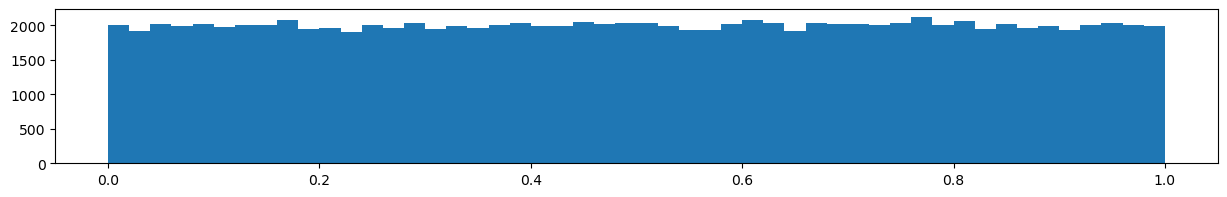

In [38]:
import matplotlib.pyplot as plt

x = np.random.rand(100000)
x
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=50)
plt.show()

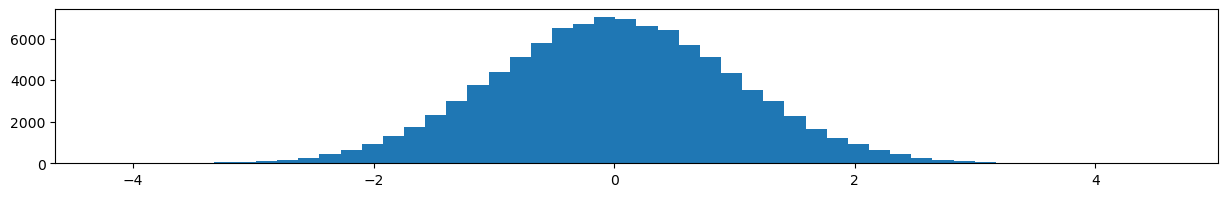

In [45]:
x = np.random.randn(100000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=50)
wplt.show()

In [52]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) # 0부터 1미만의 랜덤 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [54]:
np.random.uniform(-1, 10, (2,5)) # -1 ~ 10 미나의 균등분포 난수 배열

array([[ 7.41016495, -0.77109222,  0.48731196,  0.27900319,  2.40887343],
       [ 6.3859791 ,  4.18352756,  7.97785128,  2.18545462,  7.06438575]])

In [56]:
np.random.normal(10, 2, (2,5)) # 평균 10, 표준편차 2인 정규분포 난수 배열

array([[ 5.56293011,  8.70513844,  8.94319136,  9.92158165, 10.4299519 ],
       [ 9.23128239,  9.49219184, 10.14650415,  8.00559233,  8.57228742]])

## 2.4. 연속된 값을 갖는 배열 만들기

- np.arange(from, stop, step, dtype) : from 부터 stop 앞까지 step 씩 증감하는 정수 배열
- np.linspace(from, to, count) : from 부터 to 까지(to포함) count개 숫자를 1차원 배열

In [65]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [80]:
# linspace 는 많은 수의 점들을 생성
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)

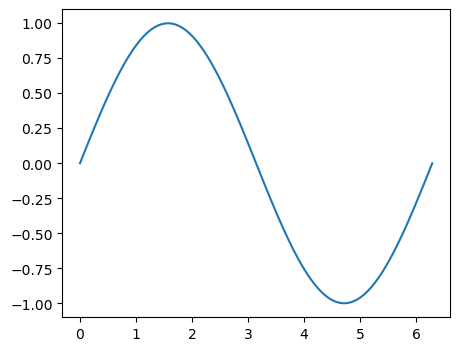

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.plot(x,y)
plt.show()

In [85]:
np.linspace(0, 2, 20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [83]:
np.arange(10, 30, 3,dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5. 배열의 차원 변경하기

- reshape([면수,] 행수, 열수) : -1 이 올 수도
- resize([면수,] 행수, 열수)  : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

```
※ 실행결과가 출력되면, 배열이 수정되지 않고, 실행결과가 없으면, 배열 수정됨
```

In [99]:
a = np.random.random((2, 3))
a

array([[0.20850049, 0.94458146, 0.07347004],
       [0.59515246, 0.03115107, 0.66525743]])

In [100]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[2., 9., 1.],
       [6., 0., 7.]])

In [101]:
a = a.reshape(3, 2)
a

array([[2., 9.],
       [1., 6.],
       [0., 7.]])

In [103]:
a.reshape(2, -1) # -1 이 주어지면, 해당 차원의 크기가 자동 계산

array([[2., 9., 1.],
       [6., 0., 7.]])

In [107]:
a = a.reshape(-1, 1)
a

array([[2.],
       [9.],
       [1.],
       [6.],
       [0.],
       [7.]])

In [111]:
a.resize((2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 (-1불가)

In [112]:
a

array([[2., 9., 1.],
       [6., 0., 7.]])